<a href="https://colab.research.google.com/github/JoseAlbertoSeco/BlablacarCarpooling_DataMining/blob/Patterns/notebooks%5CComparacionTransporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np

!wget https://github.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/raw/main/data/processed/df_trenes.csv

--2021-12-28 15:23:57--  https://github.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/raw/main/data/processed/df_trenes.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/main/data/processed/df_trenes.csv [following]
--2021-12-28 15:23:58--  https://raw.githubusercontent.com/JoseAlbertoSeco/BlablacarCarpooling_DataMining/main/data/processed/df_trenes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3444 (3.4K) [text/plain]
Saving to: ‘df_trenes.csv.1’

df_trenes.csv.1     100%[===================>]   3.36K  --.-KB/s    in 0s      

2021-12-

## Observaciones de los grafos

*   En la gráfica se puede observar como los viajes de Blablacar aumentaron en agosto de 2017 de una manera tan significativa que superaron a los transportes urbanos (metro y autobús) e interurbanos (autobús y ferrocarril).

*   A diferencia de Blablacar el transporte público, urbano e interurbano, se ve afectado en agosto, posiblemente por las vacaciones de verano.

*   El número de usuarios del transporte inter

Text(0, 0.5, 'Viajes realizados')

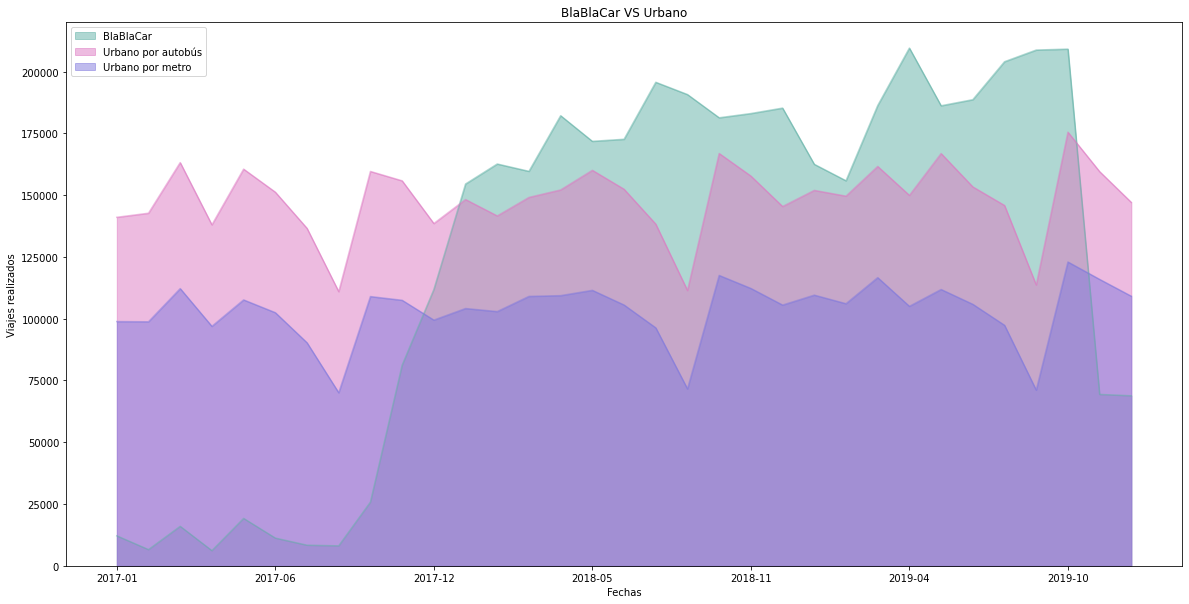

In [ ]:
import matplotlib.pyplot as plt

df_trenes = pd.read_csv('df_trenes.csv')

dataframe = pd.DataFrame({'BlaBlaCar':df_trenes['ASIENTOS_CONFIRMADOS'], 
                          'Urbano por autobús':df_trenes['Transporte urbano regular por autobús'],
                          'Urbano por metro':df_trenes['Urbano por metro'],
                          'Fechas':df_trenes['DIA']})

dataframe.set_index('Fechas',drop=True,inplace=True)
dataframe.plot(kind='area',stacked=False,figsize=(20,10), color=['#61b1a6', '#dd79c2', '#8079dd'])
plt.title("BlaBlaCar VS Urbano")
plt.ylabel("Viajes realizados")

Text(0.5, 1.0, 'BlaBlaCar VS Interurbano')

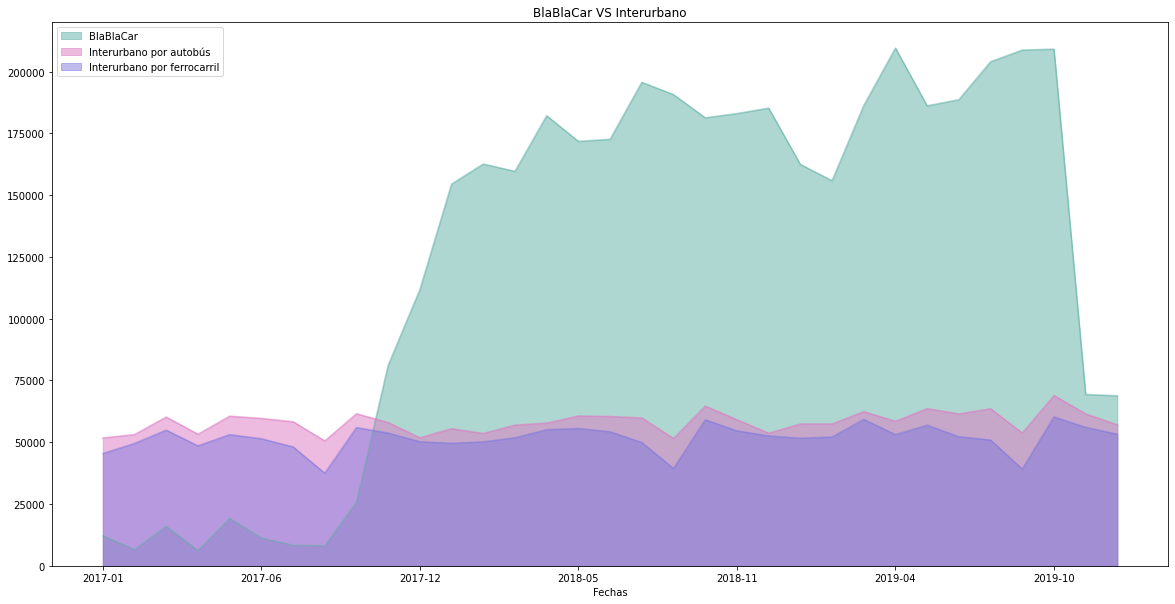

In [ ]:
dataframe2 = pd.DataFrame({'BlaBlaCar':df_trenes['ASIENTOS_CONFIRMADOS'], 
                          'Interurbano por autobús':df_trenes['Interurbano por autobús regular'],
                          'Interurbano por ferrocarril':df_trenes['Interurbano por ferrocarril'],
                          'Fechas':df_trenes['DIA']})

dataframe2.set_index('Fechas',drop=True,inplace=True)
dataframe2.plot(kind='area',stacked=False,figsize=(20,10), color=['#61b1a6', '#dd79c2', '#8079dd'])
plt.title("BlaBlaCar VS Interurbano")

Text(0, 0.5, 'Viajes realizados')

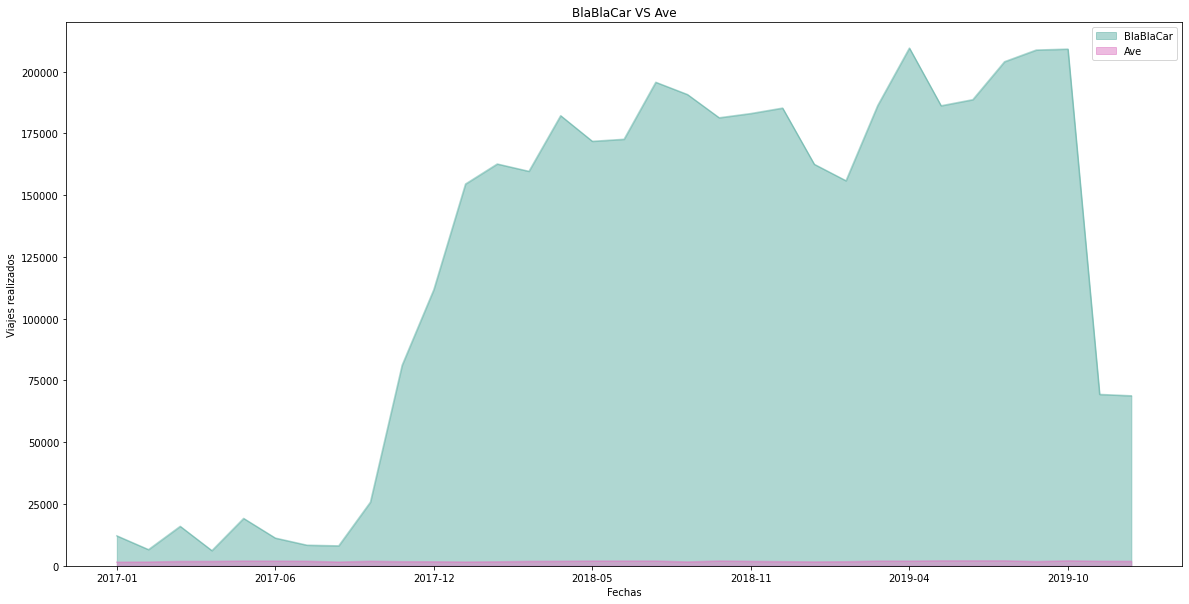

In [ ]:
dataframe3 = pd.DataFrame({'BlaBlaCar':df_trenes['ASIENTOS_CONFIRMADOS'], 
                          'Ave':df_trenes['AVE'],
                          'Fechas':df_trenes['DIA']})

dataframe3.set_index('Fechas',drop=True,inplace=True)
dataframe3.plot(kind='area',stacked=False,figsize=(20,10), color=['#61b1a6', '#dd79c2'])
plt.title("BlaBlaCar VS Ave")
plt.ylabel("Viajes realizados")

Text(0.5, 0, 'Fechas')

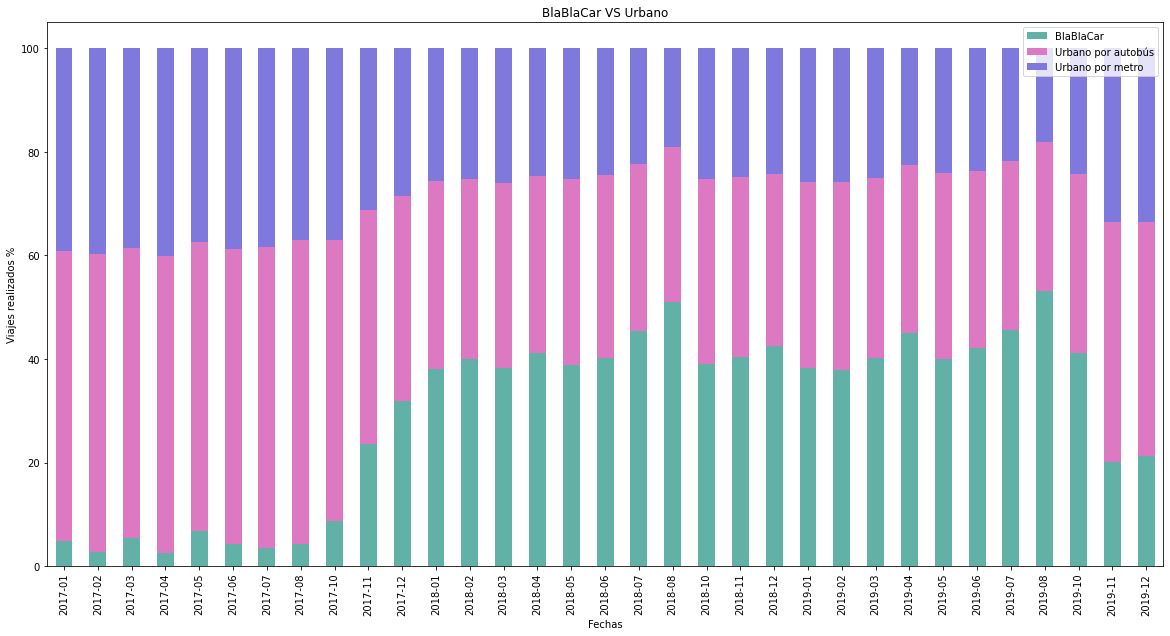

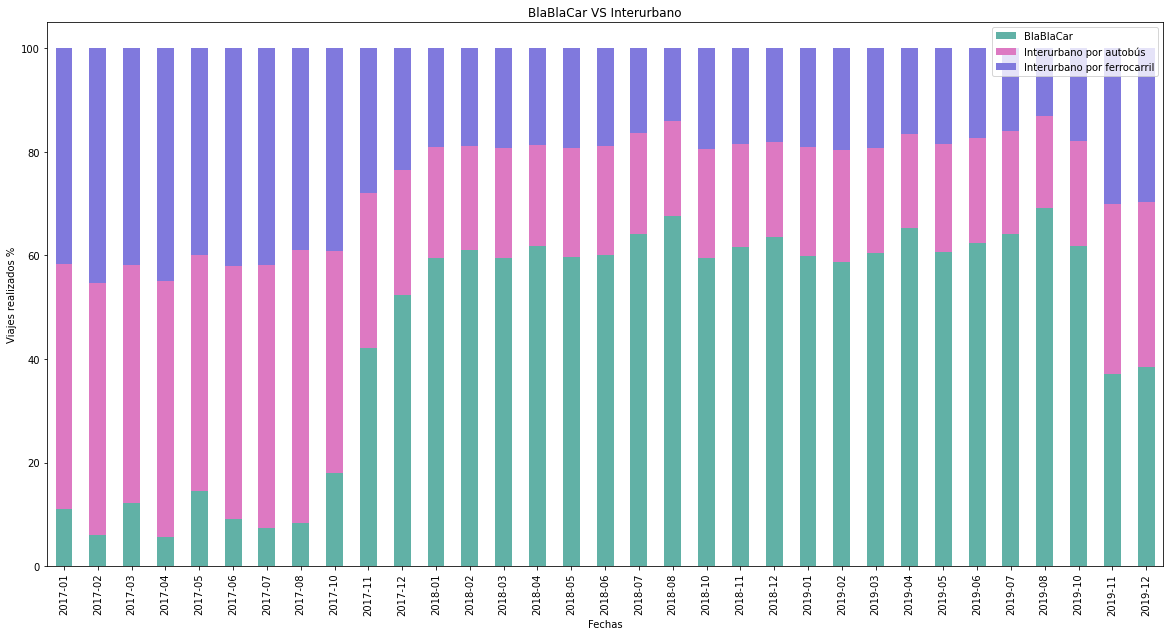

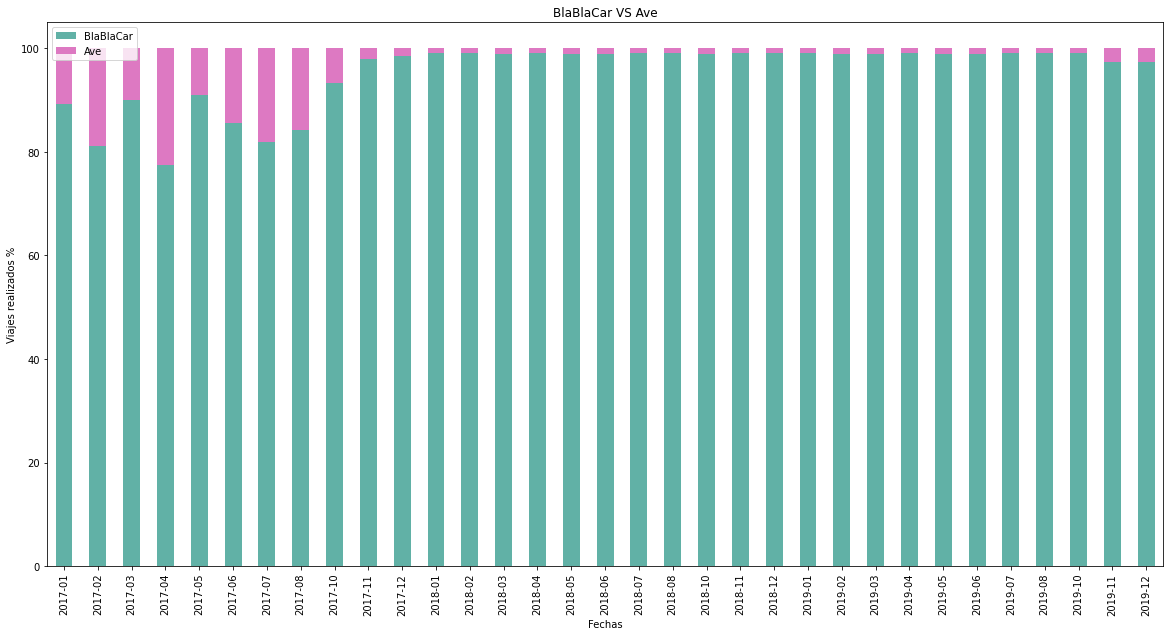

In [ ]:
import matplotlib.pyplot as plt

df_trenes = pd.read_csv('df_trenes.csv')

dataframe = pd.DataFrame({'BlaBlaCar':df_trenes['ASIENTOS_CONFIRMADOS'], 
                          'Urbano por autobús':df_trenes['Transporte urbano regular por autobús'],
                          'Urbano por metro':df_trenes['Urbano por metro'],
                          'Meses':df_trenes['DIA']})
dataframe.set_index('Meses',drop=True,inplace=True)
stacked_data = dataframe.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(20,10),color=['#61b1a6', '#dd79c2', '#8079dd'])
plt.title("BlaBlaCar VS Urbano")
plt.ylabel("Viajes realizados %")
plt.xlabel("Fechas")

dataframe2 = pd.DataFrame({'BlaBlaCar':df_trenes['ASIENTOS_CONFIRMADOS'], 
                          'Interurbano por autobús':df_trenes['Interurbano por autobús regular'],
                          'Interurbano por ferrocarril':df_trenes['Interurbano por ferrocarril'],
                          'Meses':df_trenes['DIA']})
dataframe2.set_index('Meses',drop=True,inplace=True)
stacked_data2 = dataframe2.apply(lambda x: x*100/sum(x), axis=1)
stacked_data2.plot(kind="bar", stacked=True, figsize=(20,10),color=['#61b1a6', '#dd79c2', '#8079dd'])
plt.title("BlaBlaCar VS Interurbano")
plt.ylabel("Viajes realizados %")
plt.xlabel("Fechas")


dataframe3 = pd.DataFrame({'BlaBlaCar':df_trenes['ASIENTOS_CONFIRMADOS'], 
                          'Ave':df_trenes['AVE'],
                          'Meses':df_trenes['DIA']})
dataframe3.set_index('Meses',drop=True,inplace=True)
stacked_data3 = dataframe3.apply(lambda x: x*100/sum(x), axis=1)
stacked_data3.plot(kind="bar", stacked=True, figsize=(20,10),color=['#61b1a6', '#dd79c2'])
plt.title("BlaBlaCar VS Ave")
plt.ylabel("Viajes realizados %")
plt.xlabel("Fechas")

In [ ]:
from tabulate import tabulate

diffBusUrb = []
diffMetUrb = []
diffBusInt = []
diffFerInt = []
diffAve = []

for i in range(len(df_trenes['DIA'])):
  diffBusUrb.append(df_trenes['ASIENTOS_CONFIRMADOS'][i]-df_trenes['Transporte urbano regular por autobús'][i])
  diffMetUrb.append(df_trenes['ASIENTOS_CONFIRMADOS'][i]-df_trenes['Urbano por metro'][i])
  diffBusInt.append(df_trenes['ASIENTOS_CONFIRMADOS'][i]-df_trenes['Interurbano por autobús regular'][i])
  diffFerInt.append(df_trenes['ASIENTOS_CONFIRMADOS'][i]-df_trenes['Interurbano por ferrocarril'][i])
  diffAve.append(df_trenes['ASIENTOS_CONFIRMADOS'][i]-df_trenes['AVE'][i])

df_diff = pd.DataFrame({
    'Fecha':df_trenes['DIA'],
    'Autobús Urbano':diffBusUrb,
    'Metro Urbano':diffMetUrb,
    'Autobús Interurbano':diffBusInt,
    'Ferrocarrol Interurbano':diffFerInt,
    'AVE':diffAve
})
df_diff.set_index('Fecha',drop=True,inplace=True)

print(tabulate(df_diff, headers="keys"))

Fecha      Autobús Urbano    Metro Urbano    Autobús Interurbano    Ferrocarrol Interurbano     AVE
-------  ----------------  --------------  ---------------------  -------------------------  ------
2017-01           -128915          -86720                 -39622                     -33321   10673
2017-02           -136148          -92209                 -46585                     -43004    5030
2017-03           -147223          -96214                 -44268                     -38943   14199
2017-04           -131869          -90788                 -47136                     -42438    4349
2017-05           -141364          -88438                 -41409                     -33931   17258
2017-06           -140007          -91239                 -48449                     -40218    9323
2017-07           -128249          -81938                 -49986                     -39819    6499
2017-08           -102873          -61961                 -42486                     -29409    6561


Text(0, 0.5, 'Viajes realizados')

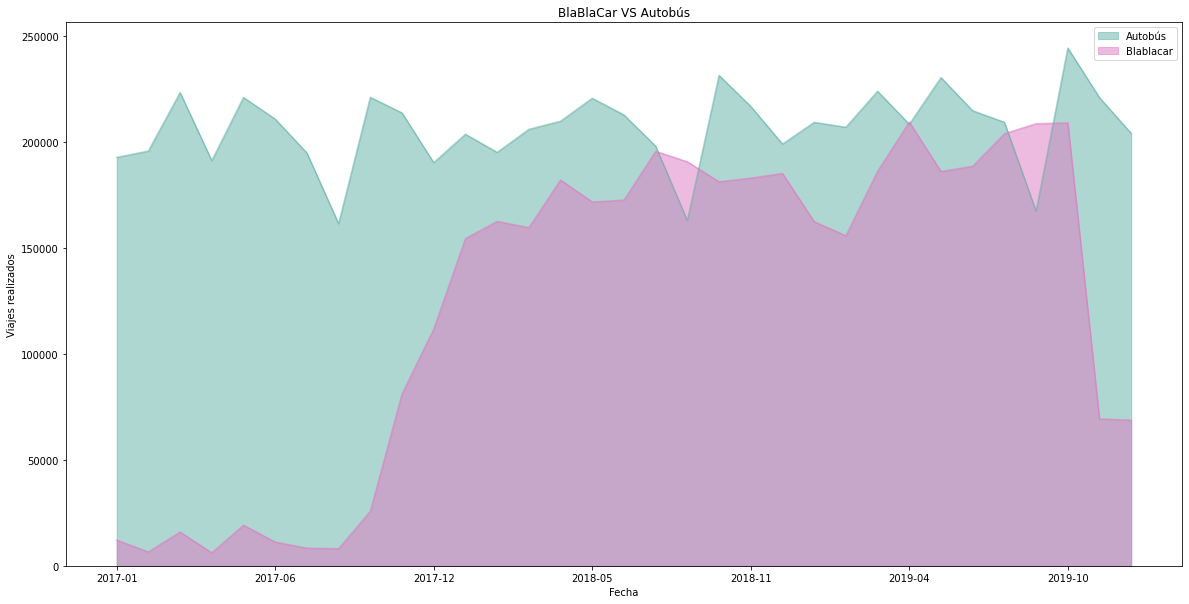

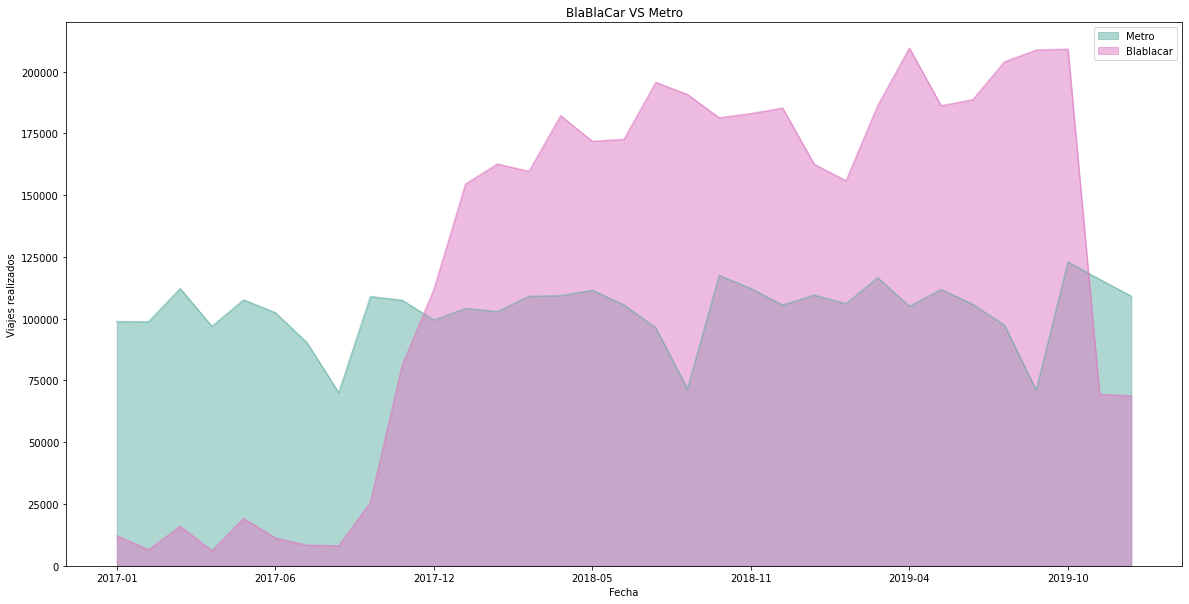

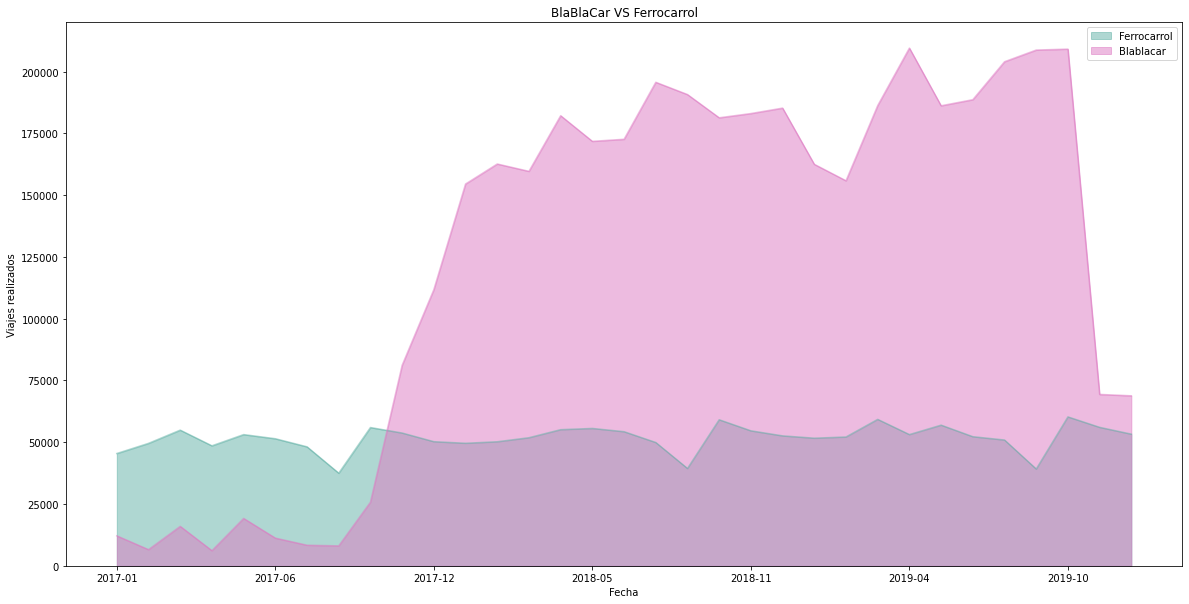

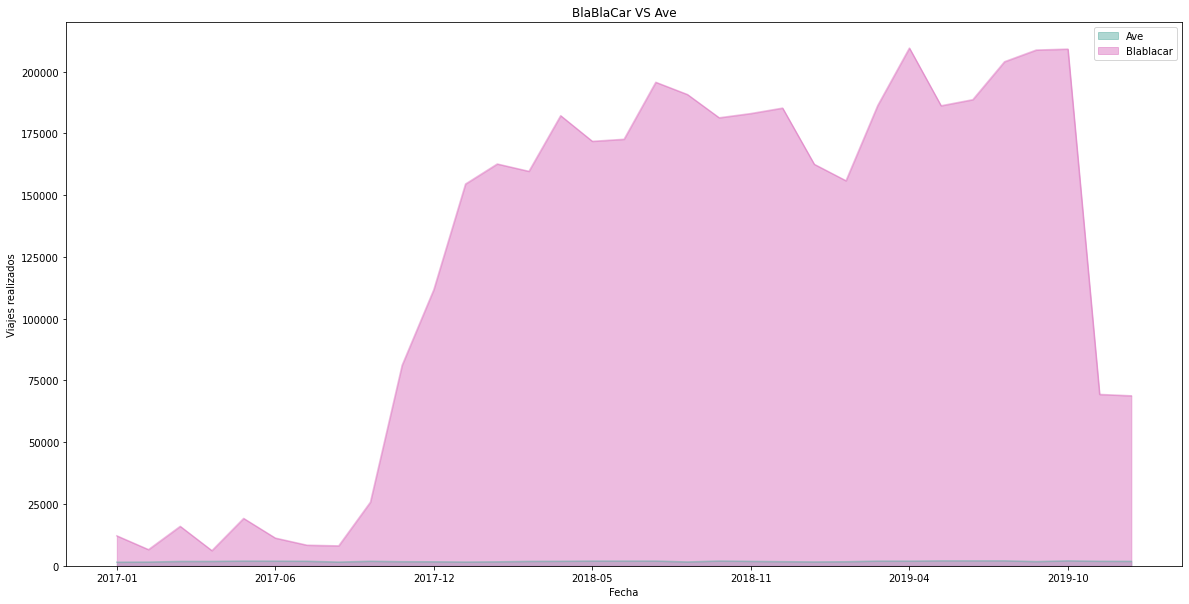

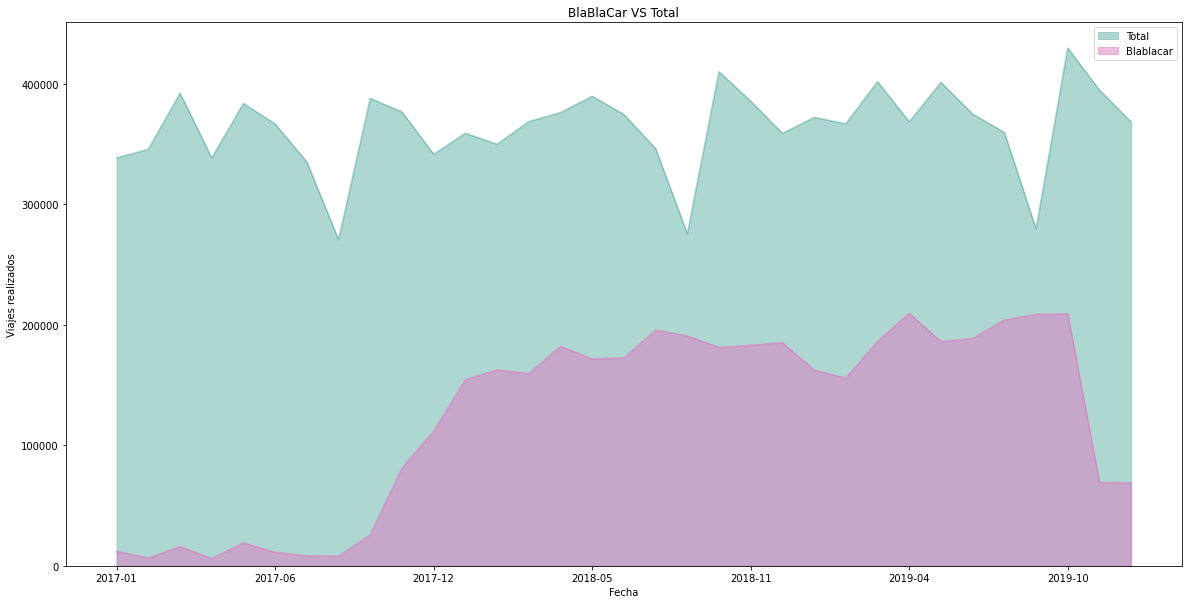

In [ ]:
from tabulate import tabulate

viajesAutobus = []
viajesMetro = []
viajesFerrocarril = []
viajesAve = []
viajesTrans = []

for i in range(len(df_trenes['DIA'])):
  viajesAutobus.append(df_trenes['Interurbano por autobús regular'][i]+df_trenes['Transporte urbano regular por autobús'][i])
  viajesMetro.append(df_trenes['Urbano por metro'][i])
  viajesFerrocarril.append(df_trenes['Interurbano por ferrocarril'][i])
  viajesAve.append(df_trenes['AVE'][i])
  viajesTrans.append(viajesAutobus[i]+viajesMetro[i]+viajesFerrocarril[i]+viajesAve[i])

df_viajes = pd.DataFrame({
    'Fecha':df_trenes['DIA'],
    'Blablacar':df_trenes['ASIENTOS_CONFIRMADOS'],
    'Autobús':viajesAutobus,
    'Metro':viajesMetro,
    'Ferrocarrol':viajesFerrocarril,
    'Ave':viajesAve,
    'Total':viajesTrans
})
df_viajes.set_index('Fecha',drop=True,inplace=True)

df_viajes[['Autobús','Blablacar']].plot(kind='area',stacked=False,figsize=(20,10), color=['#61b1a6', '#dd79c2'])
plt.title("BlaBlaCar VS Autobús")
plt.ylabel("Viajes realizados")

df_viajes[['Metro','Blablacar']].plot(kind='area',stacked=False,figsize=(20,10), color=['#61b1a6', '#dd79c2'])
plt.title("BlaBlaCar VS Metro")
plt.ylabel("Viajes realizados")

df_viajes[['Ferrocarrol','Blablacar']].plot(kind='area',stacked=False,figsize=(20,10), color=['#61b1a6', '#dd79c2'])
plt.title("BlaBlaCar VS Ferrocarrol")
plt.ylabel("Viajes realizados")

df_viajes[['Ave','Blablacar']].plot(kind='area',stacked=False,figsize=(20,10), color=['#61b1a6', '#dd79c2'])
plt.title("BlaBlaCar VS Ave")
plt.ylabel("Viajes realizados")

df_viajes[['Total','Blablacar']].plot(kind='area',stacked=False,figsize=(20,10), color=['#61b1a6', '#dd79c2'])
plt.title("BlaBlaCar VS Total")
plt.ylabel("Viajes realizados")
